In [50]:
import sqlite3
import pandas
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
from sklearn import linear_model, model_selection

In [32]:
engine = create_engine('sqlite:///citydata.db')

main_data = pandas.read_sql_table('uza_table', engine)

main_data['Transport Spending/GDP per Capita'] = main_data['Per Capita Transit Operating Expense / yr'] / main_data["Per Capita GDP"]

main_data

,AA Urbanized Area (UZA) Name,Transit Score,UZA code,UZA Population,Public Transit Percent,$ Op Expenses,Cost Recovery Ratio,PMT Transit,% PMT Rail,Per Capita Transit Passenger Miles / yr,Per Capita Transit Operating Expense / yr,Local Miles,Per Capita Congestion Delay hrs/yr- calc,"Transport Expenditures, Percent of Total Income",Travel to Work - Public Transit Percent,Per Capita GDP,Transport Spending/GDP per Capita
0,"New York-Newark, NY-NJ-CT",16.485374,1.0,18351295,0.311,1.026763e+10,0.49,2.146148e+10,0.78,1179.5,564.28,31090.0,21.6,0.11,31.1,57097.0,0.009883
1,"Los Angeles-Long Beach-Santa Ana, CA",4.463132,2.0,12150996,0.063,1.931640e+09,0.25,3.220185e+09,0.28,260.8,156.47,15884.0,39.1,0.13,6.3,47214.0,0.003314
2,"Chicago, IL-IN",5.571369,3.0,8608208,0.126,2.195390e+09,0.34,4.025080e+09,0.73,447.8,244.26,18298.0,24.9,0.12,12.6,45463.0,0.005373
3,"Philadelphia, PA-NJ-DE-MD",2.185882,4.0,5502379,0.099,1.037151e+09,0.37,1.600265e+09,0.66,302.5,196.02,13917.0,21.1,0.11,9.9,47256.0,0.004148
4,"Miami, FL",2.370292,5.0,5441567,0.037,7.009442e+08,0.18,9.725376e+08,0.25,179.3,129.25,13038.0,28.2,0.14,3.7,40447.0,0.003196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,"Columbia, SC",-3.240032,77.0,548404,0.010,9.534322e+06,0.24,1.190760e+07,0.00,26.1,20.91,1600.0,8.5,NaN,1.0,33942.0,0.000616
76,"Knoxville, TN",-2.135542,78.0,546026,0.006,1.375284e+07,0.09,1.231158e+07,0.00,25.2,28.18,2284.0,NaN,NaN,0.6,37064.0,0.000760
77,"Youngstown, OH-PA",-2.195273,80.0,530290,0.006,8.337207e+06,0.12,6.153944e+06,0.00,14.4,19.53,1881.0,NaN,NaN,0.6,24974.0,0.000782
78,"Syracuse, NY",-0.760076,81.0,523994,0.028,4.180678e+07,0.23,4.215230e+07,0.00,97.8,97.00,1375.0,NaN,NaN,2.8,35028.0,0.002769


In [33]:
features = main_data[['Cost Recovery Ratio', '% PMT Rail', 'Per Capita Transit Operating Expense / yr', 'Per Capita GDP', 'Transport Spending/GDP per Capita']]
X = features.fillna(0, inplace=False)
X = X.rename(str,axis="columns") 
y = main_data['Transit Score']

lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(X, y)

lin_reg_predictions = lin_reg_model.predict(X)

In [34]:
coef = lin_reg_model.coef_

coef

array([ 1.13747486e-01,  1.03780835e+00,  3.92201140e-02,  4.68104987e-06,
       -6.89971469e+02])

In [35]:
lin_reg_model.intercept_

-2.7751277336283957

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( 
    X, y, test_size=0.3, random_state=101)

lin_reg_model2 = linear_model.LinearRegression()

lin_reg_model2.fit(X_train, y_train)

predictions = lin_reg_model2.predict(X_test)

In [37]:
coef2 = lin_reg_model2.coef_

In [40]:
low_pop_data = pandas.read_sql_table('Low Pop Cities', engine)
low_pop_data['Transport Spending/GDP per Capita'] = low_pop_data['Per Capita Transit Operating Expense / yr'] / low_pop_data["Per Capita GDP"]



In [43]:
low_pop_features = low_pop_data[['Cost Recovery Ratio', '% PMT Rail', 'Per Capita Transit Operating Expense / yr', 'Per Capita GDP', 'Transport Spending/GDP per Capita']]
Xlp2 = low_pop_features.fillna(0, inplace=False)
Xlp2 = Xlp2.rename(str,axis="columns")

predictions2 = lin_reg_model2.predict(Xlp2)

predictions2


array([-2.10695524, -1.98598149, -1.26429481, -1.55492336, -1.41071287,
       -1.72217249, -1.96999199, -1.63724236, -1.50462448, -2.39478218,
        0.09997371, -1.76861621,  0.35530924, -2.22540792, -1.76713136,
       -2.12451201,  1.31354851, -2.06457361,  0.1317075 , -2.36293612,
       -0.29420798, -1.7204048 , -1.80839652, -1.35073951, -2.25435972,
        1.882219  , -1.81625964, -1.11371557, -0.26069715, -1.77394926,
       -2.27215032, -1.57114299, -1.92530828, -2.44919891, -1.17597631,
       -1.75659461, -1.34458894, -1.70143151, -2.10074701, -1.72288211,
       -1.69007569, -1.20011125, -1.1793053 , -1.56026247, -2.18305742,
       -1.57648811, -1.65271923,  0.29320855])

In [45]:
low_pop_names = low_pop_data[["AA Urbanized Area (UZA) Name", "UZA code", "UZA Population"]]

low_pop_names["Predicted Scores"] = predictions2

/tmp/ipykernel_80882/3164229342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_pop_names["Predicted Scores"] = predictions2


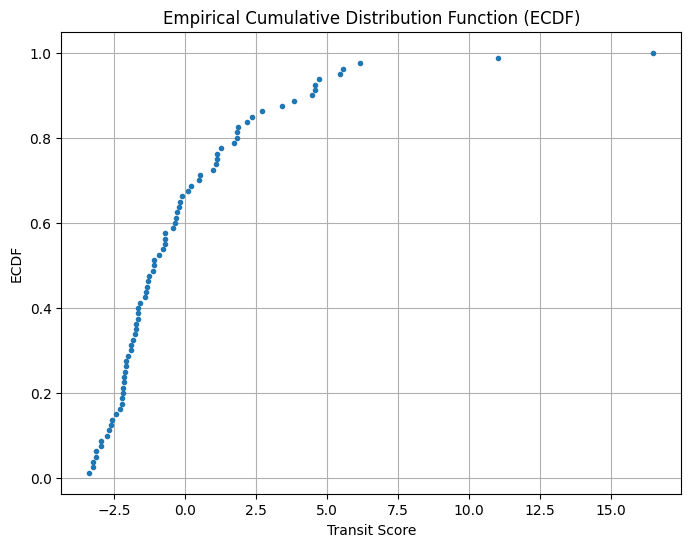

In [51]:
import numpy as np

transit_scores = main_data[["AA Urbanized Area (UZA) Name", "Transit Score"]]

transit_scores_sorted = transit_scores.sort_values('Transit Score')

n = len(transit_scores_sorted)
y = np.arange(1, n + 1) / n

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(transit_scores_sorted['Transit Score'], y, marker='.', linestyle='none')
plt.xlabel('Transit Score')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.grid(True)
plt.show()
